In [3]:
%matplotlib inline
import geopandas as gpd
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [4]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Biaxial weave

<Axes: >

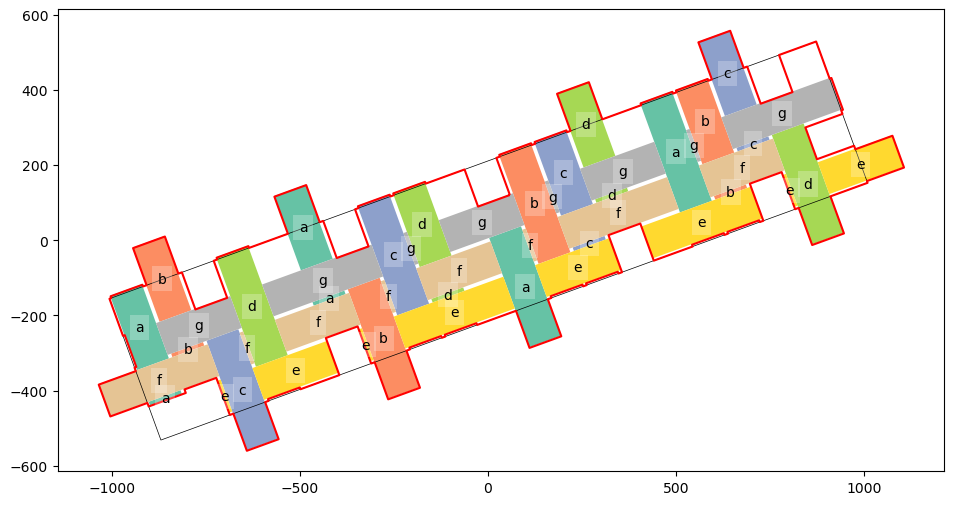

In [5]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = .9,
               strands = "abcd-|efg-", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [6]:
weave1 = Tiling(w1, ak)

In [7]:
textile1 = weave1.get_tiled_map(debug = True,
                                join_on_prototiles = False)

STEP 1: prep data (rotation if requested): 0.009
STEP A2: overlay zones with tiling: 1.172
STEP A3: calculate areas: 0.002
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.248
STEP A6: perform lookup join: 0.007


In [8]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG",   
                                "PRGn", "PuOr")))

Only a list of variables specified, assigning to
            available tile_ids.


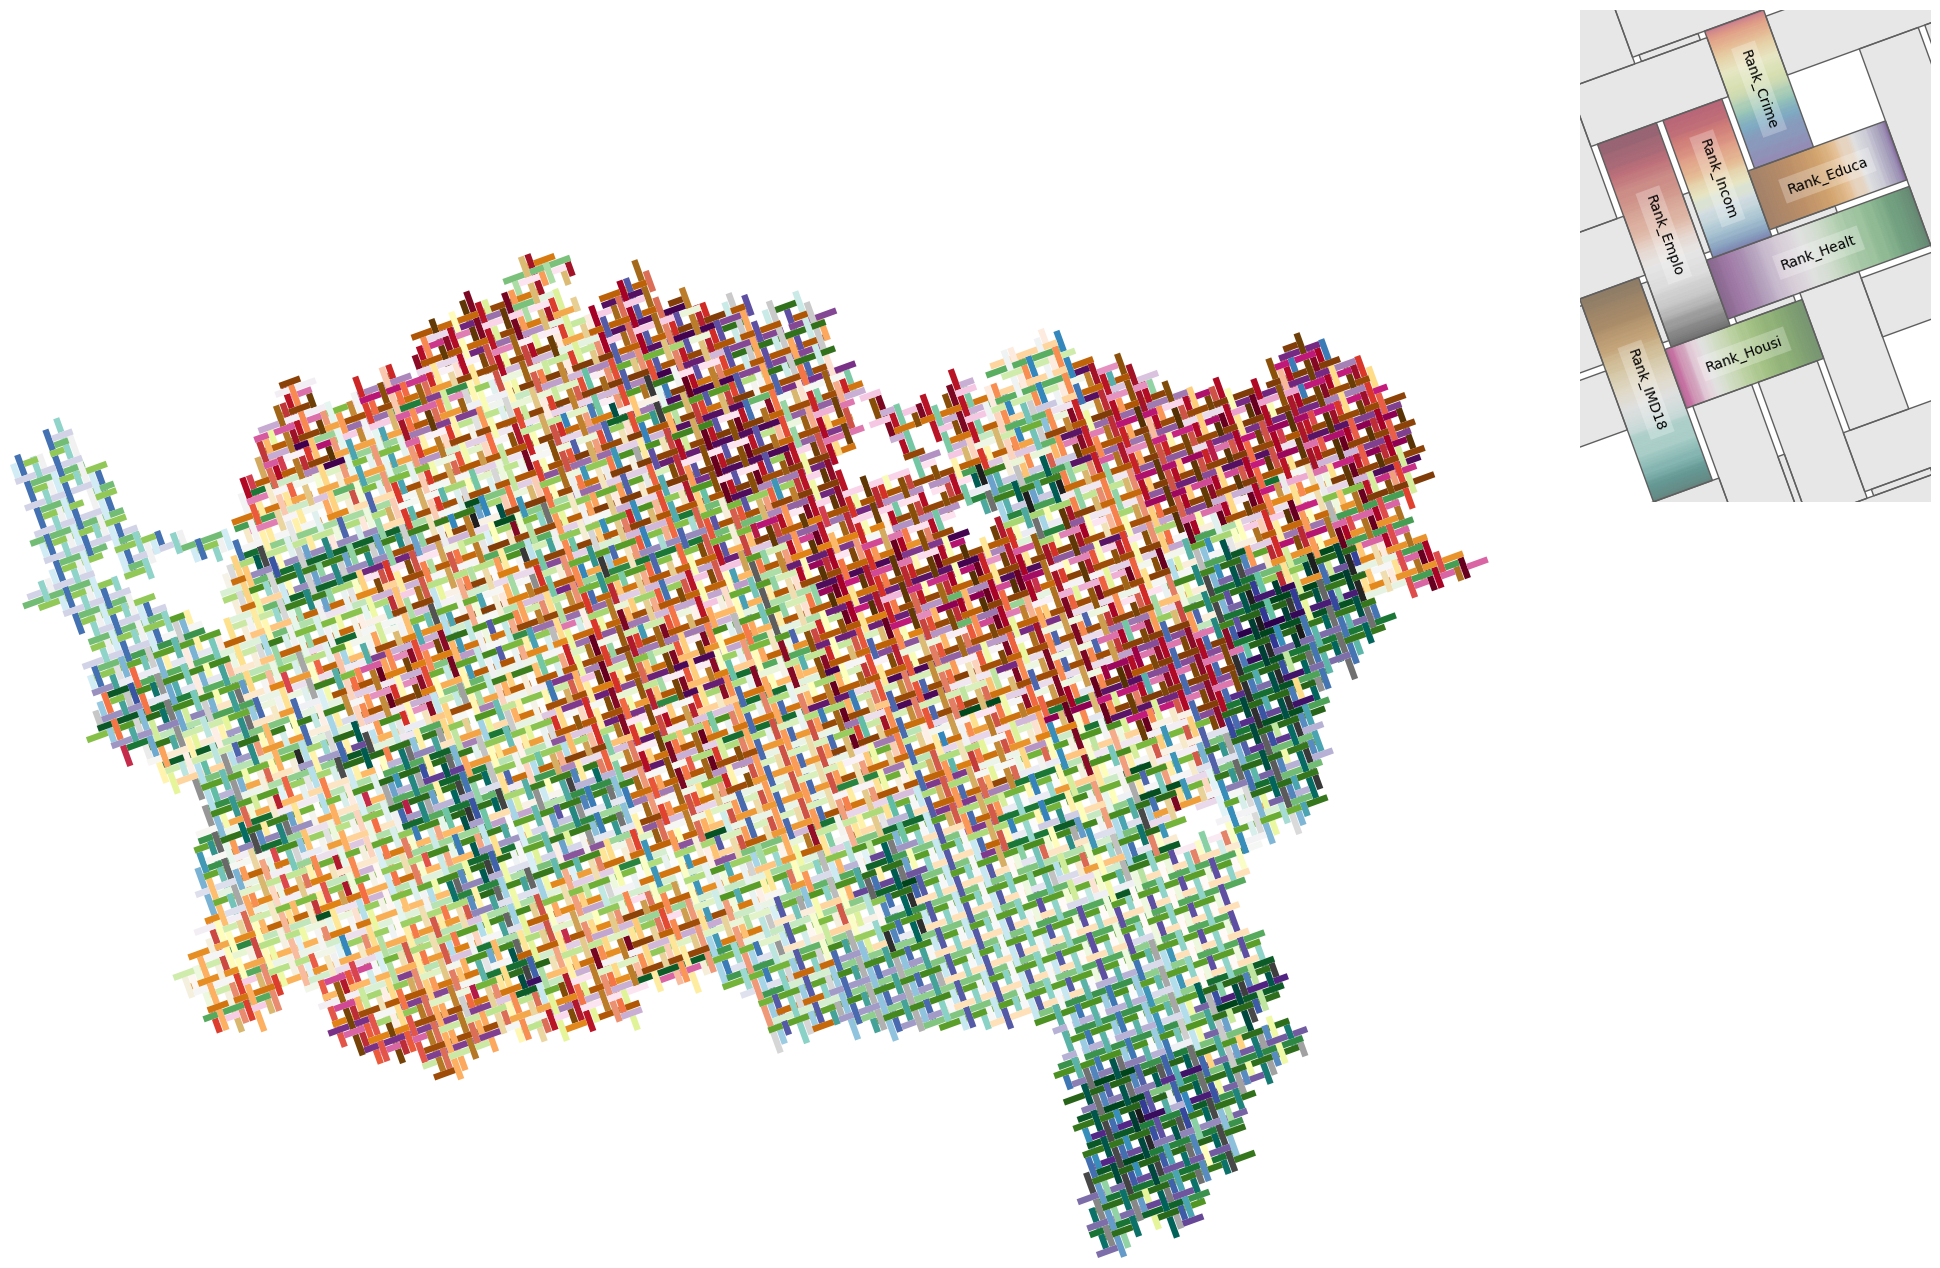

In [9]:
fig = textile1.render(legend = True)

## Triaxial weave

<Axes: >

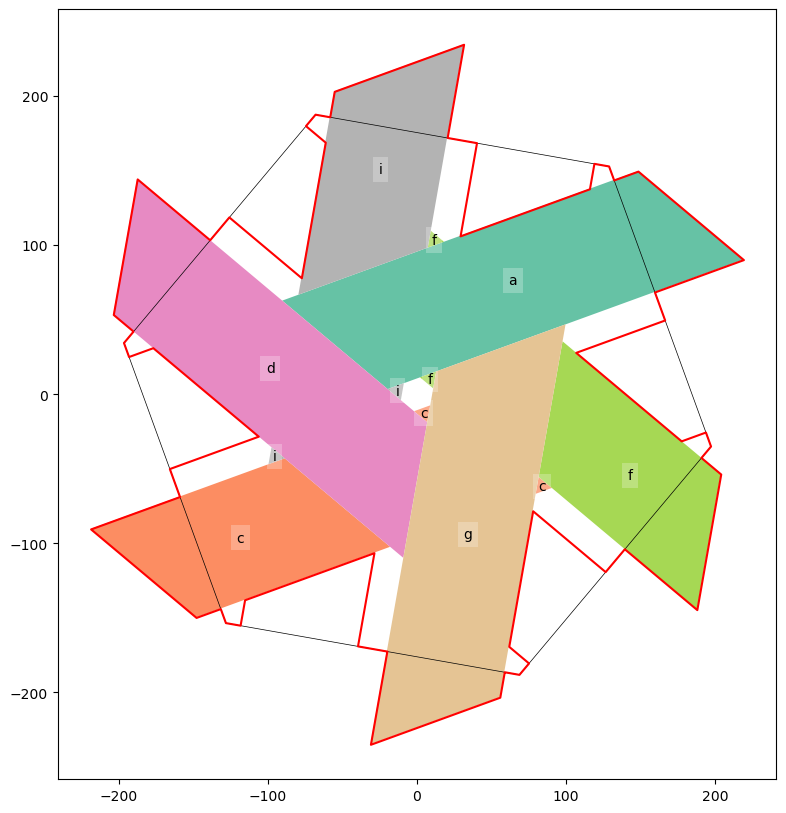

In [10]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .8,
               strands = "a-c|d-f|g-i", crs = ak.crs).transform_rotate(20)#.inset_tiles(1)
w2.plot(r = 0, cmap = "Set2", figsize = (10, 10))

In [11]:
weave2 = Tiling(w2, ak)

In [12]:
textile2 = weave2.get_tiled_map(# prioritise_tiles = True, ragged_edges = True,
                                debug = True, join_on_prototiles = False)

STEP 1: prep data (rotation if requested): 0.011
STEP A2: overlay zones with tiling: 1.386
STEP A3: calculate areas: 0.001
STEP A4: drop columns prior to join: 0.001
STEP A5: build lookup for join: 0.405
STEP A6: perform lookup join: 0.007


In [13]:
textile2.variables = dict(zip(list("acdfgi"),
                              [x for x in ak if "Rank" in x]))
textile2.colourmaps = dict(zip(textile2.variables.values(),
                               ("BrBG", "RdGy", "RdYlBu", "Spectral",
                                "PiYG", "PRGn", "PuOr", "viridis")))

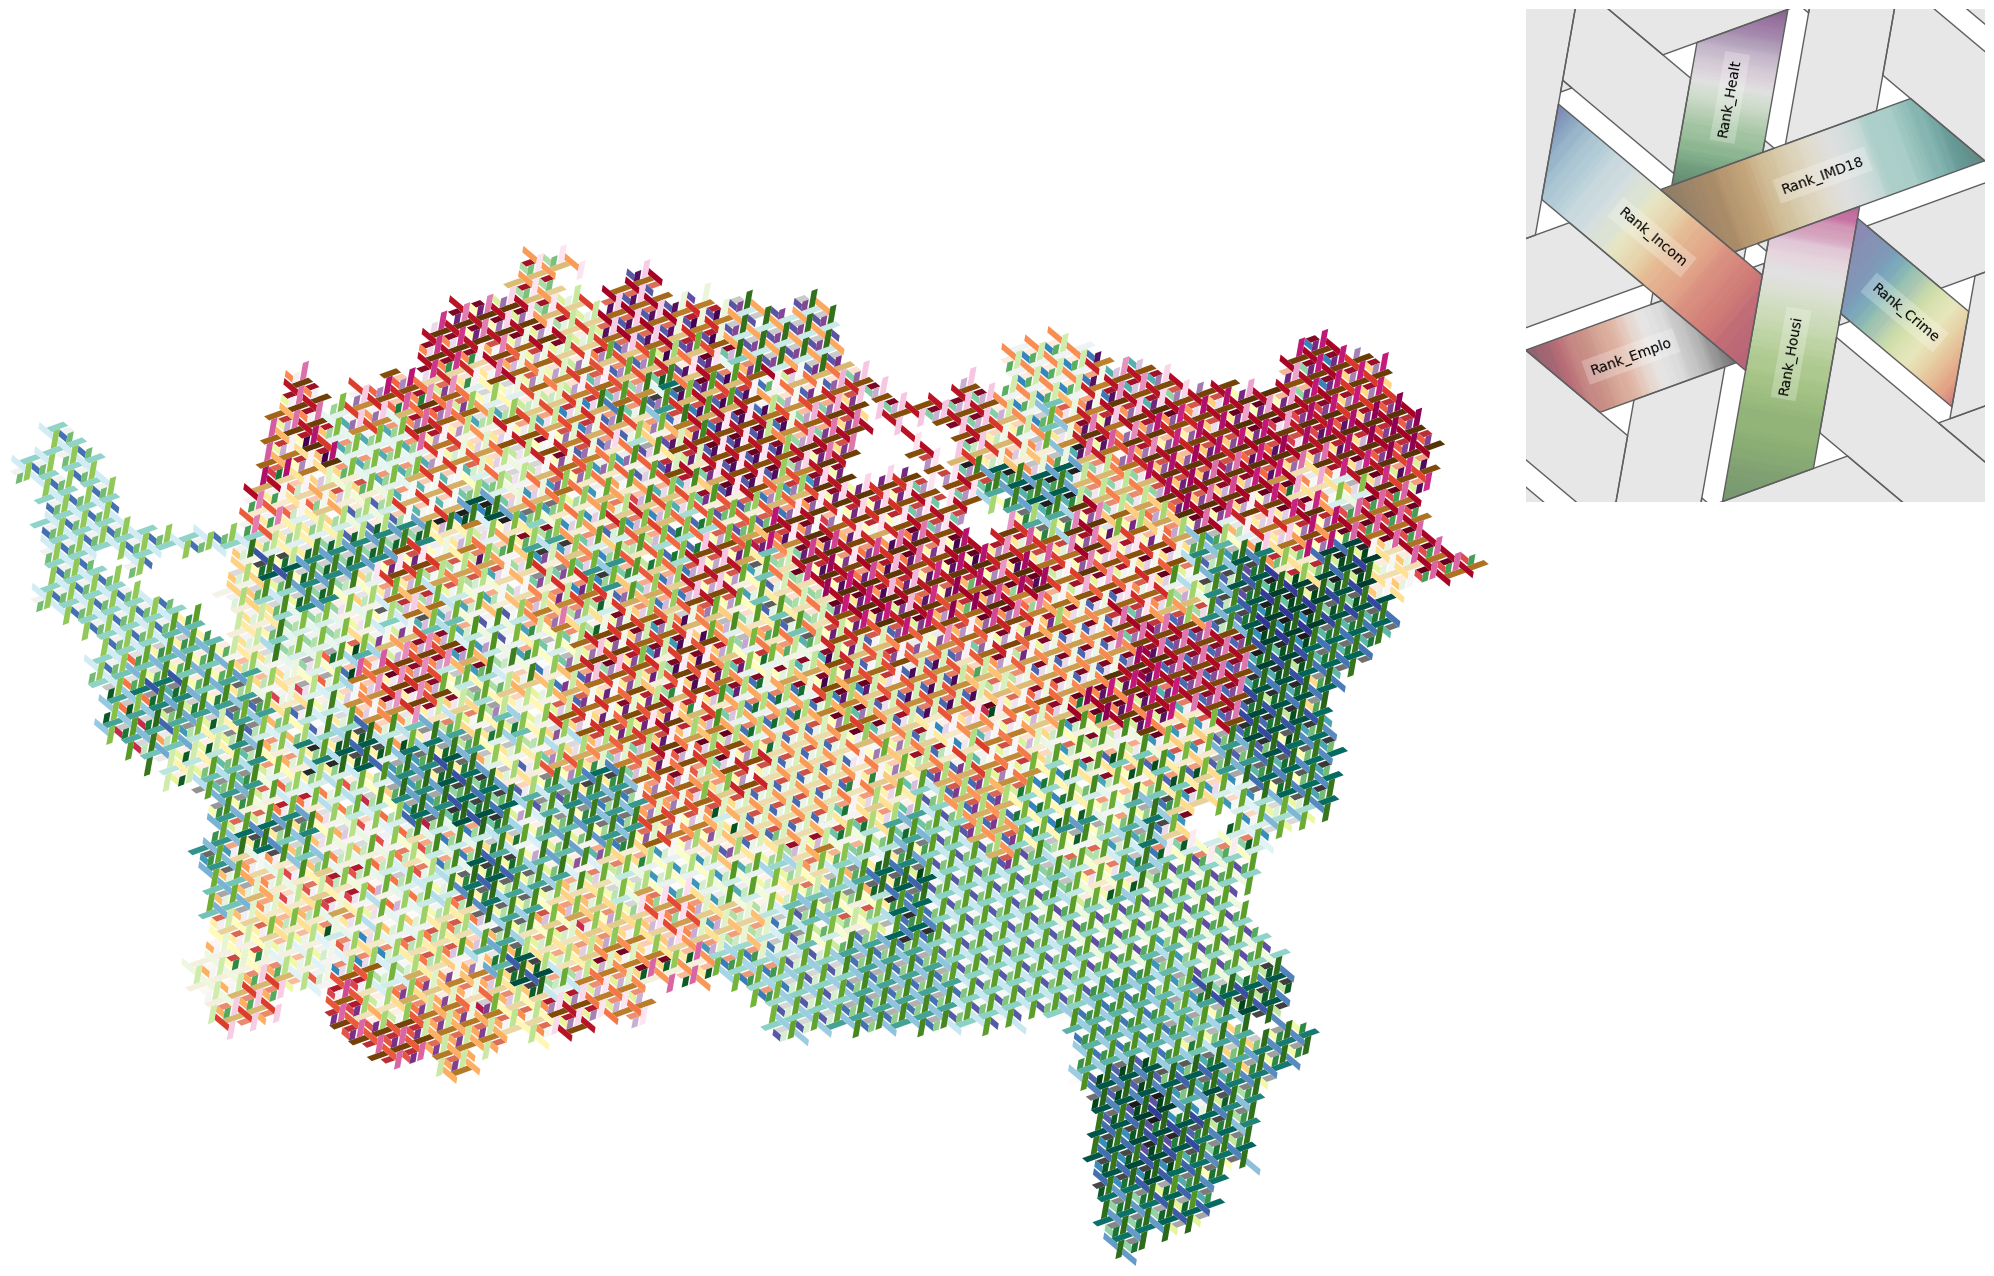

In [14]:
fig = textile2.render(legend = True)